## Coursera Assignment 1: Air Pollution

### Part 1

A function named **pollutantmean** calculates the mean of a pollutant (sulfate or nitrate) across a specified list of monitors. The function takes three arguments: 'directory', 'pollutant', and 'id'. Given a vector monitor ID numbers, 'pollutantmean' reads that monitors' particulate matter data from the directory specified in the 'directory' argument and returns the mean of the pollutant across all of the monitors, ignoring any missing values coded as NA.

In [1]:
setwd("/YandexDisk/Repository/R/Cursera")

In [2]:
pollutantmean <- function(directory, pollutant, id = 1:332) {
    df <- data.frame()
    files <- list.files(directory, full.names = TRUE)
    for (i in id) {
        df <- rbind(df, read.csv(files[i]))
    }

    mean(df[, pollutant], na.rm = TRUE)
}

In [54]:
pollutantmean("specdata", "sulfate", 34)

[1] 1.477143

In [53]:
pollutantmean("specdata", "nitrate", 70:72)

[1] 1.706047

In [52]:
pollutantmean("specdata", "sulfate", 1:10)

[1] 4.064128

In [55]:
pollutantmean("specdata", "nitrate")

[1] 1.702932

### Part 2

**Complete** is a function that reads a directory full of files and reports the number of completely observed cases in each data file. The function returns a data frame where the first column is the name of the file and the second column is the number of complete cases.

In [25]:
complete <- function(directory, id = 1:332) {
    files <- list.files(directory, full.names = TRUE)
    spots <- data.frame()
    for (i in id) {
        spots <- rbind(spots, c(i, sum(complete.cases(read.csv(files[i])))))
    }
    colnames(spots) <- c('id', 'nobs') 
    print(spots)
}

In [56]:
cc <- complete("specdata", c(6, 10, 20, 34, 100, 200, 310))
print(cc$nobs)

   id nobs
1   6  228
2  10  148
3  20  124
4  34  165
5 100  104
6 200  460
7 310  232
[1] 228 148 124 165 104 460 232


In [57]:
cc <- complete("specdata", 54)
print(cc$nobs)

  id nobs
1 54  219
[1] 219


In [ ]:
RNGversion("3.5.1")  
set.seed(42)
cc <- complete("specdata", 332:1)
use <- sample(332, 10)
print(cc[use, "nobs"])

In [61]:
cr <- corr("specdata")                
cr <- sort(cr)   
RNGversion("3.5.1")
set.seed(868)                
out <- round(cr[sample(length(cr), 5)], 4)
print(out)

Warning message in RNGkind("Mersenne-Twister", "Inversion", "Rounding"):
"non-uniform 'Rounding' sampler used"


[1]  0.2688  0.1127 -0.0086  0.4586  0.0447


In [63]:
cr <- corr("specdata", 129)                
cr <- sort(cr)                
n <- length(cr)    
RNGversion("3.5.1")
set.seed(197)                
out <- c(n, round(cr[sample(n, 5)], 4))
print(out)

Warning message in RNGkind("Mersenne-Twister", "Inversion", "Rounding"):
"non-uniform 'Rounding' sampler used"


[1] 243.0000   0.2540   0.0504  -0.1462  -0.1680   0.5969


____________
Here is another way to solve the problem:

In [32]:
complete1 <- function(directory, id = 1:332) {
    spots <- data.frame() 
    for (i in id) {
      # Чтобы сформировать пути файлов для обработки, используем функцию форматирования строкового 
      # вектора sprintf(fmt, ...), где fmt(format) задается %(начало трансформации) + 
      # 03 (размерность числа с ведущими нулями) + d (целое десятичное число)
    tmp_file <- paste(directory, "/", sprintf("%03d", i),".csv",sep="")                                                                   
    spots <- rbind(spots, c(sprintf("%03d", i), sum(complete.cases(read.csv(tmp_file)))))
    }
    colnames(spots) <- c('id', 'nobs') 
    print(spots)
}

In [35]:
complete1("specdata", c(2, 4, 8, 10, 12))

   id nobs
1 002 1041
2 004  474
3 008  192
4 010  148
5 012   96


## Part 3

**Corr** is a function that takes a directory of data files and a threshold for complete cases and calculates *the correlation between sulfate and nitrate* for monitor locations where the number of completely observed cases (on all variables) is *greater* than the threshold. The function should return a vector of correlations for the monitors that meet the threshold requirement. If no monitors meet the threshold requirement, then the function should return a numeric vector of length 0.

In [46]:
corr <- function(directory, threshold = 0) {
    files <- list.files(directory, pattern="*.csv", full.names = TRUE) # get file list to load
    spots_data <- lapply(files, read.csv)  # apply function reaf.csv to combine the file list in one file
    spots_data <- do.call(rbind, spots_data) # do.call constructs and executes a function call from a name 
                                             # or a function and a list of arguments 
    spots_data <- spots_data[complete.cases(spots_data), ] # getting rid of NA's in our data frame
    
    v <- numeric()
    
    for (i in 1:length(files)) {
        data <- subset(spots_data, spots_data[, 4] == i)
        n_rows <- nrow(data)
        
        if (n_rows > threshold) {
            c <- cor(data$sulfate, data$nitrate)
            c <- round(c, digits = 5)
            v <- c(v, c)
        }
    }
    return(v)
}

In [47]:
cr <- corr("specdata", 150)
head(cr)

[1] -0.01896 -0.14051 -0.04390 -0.06816 -0.12351 -0.07589

In [48]:
summary(cr)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.21057 -0.04999  0.09463  0.12525  0.26845  0.76313 

In [49]:
cr <- corr("specdata", 400)
head(cr)

[1] -0.01896 -0.04390 -0.06816 -0.07589  0.76313 -0.15783

In [50]:
summary(cr)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.17623 -0.03109  0.10021  0.13969  0.26849  0.76313 

In [51]:
cr <- corr("specdata", 5000)
summary(cr)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

In [65]:
cr <- corr("specdata", 2000)                
n <- length(cr)                
cr <- corr("specdata", 1000)                
cr <- sort(cr)
print(c(n, round(cr, 4)))

[1]  0.0000 -0.0190  0.0419  0.1901


---------

Let's try to plot a missing value heat map

In [2]:
library(ggplot2)

In [3]:
scan_dir <- function(directory) {
    files <- list.files(directory, pattern="*.csv", full.names = TRUE) 
    spots_data <- lapply(files, read.csv)
    spots_data <- do.call(rbind, spots_data) 
    return(spots_data)
}

In [4]:
df <- scan_dir("specdata")

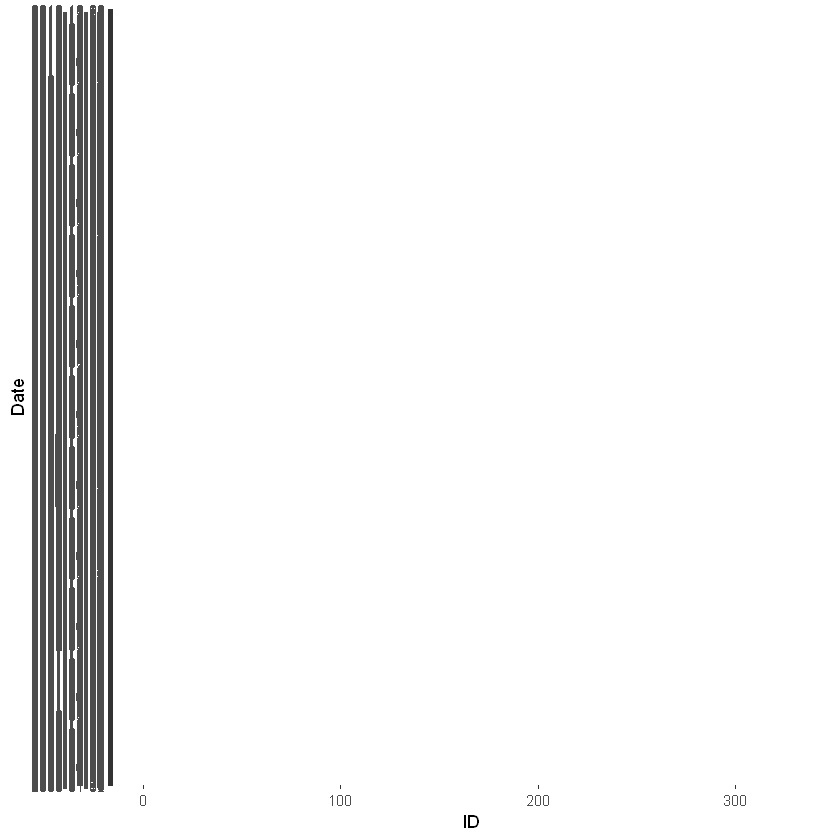

In [74]:
ggplot(df, aes(x = ID, y = Date))

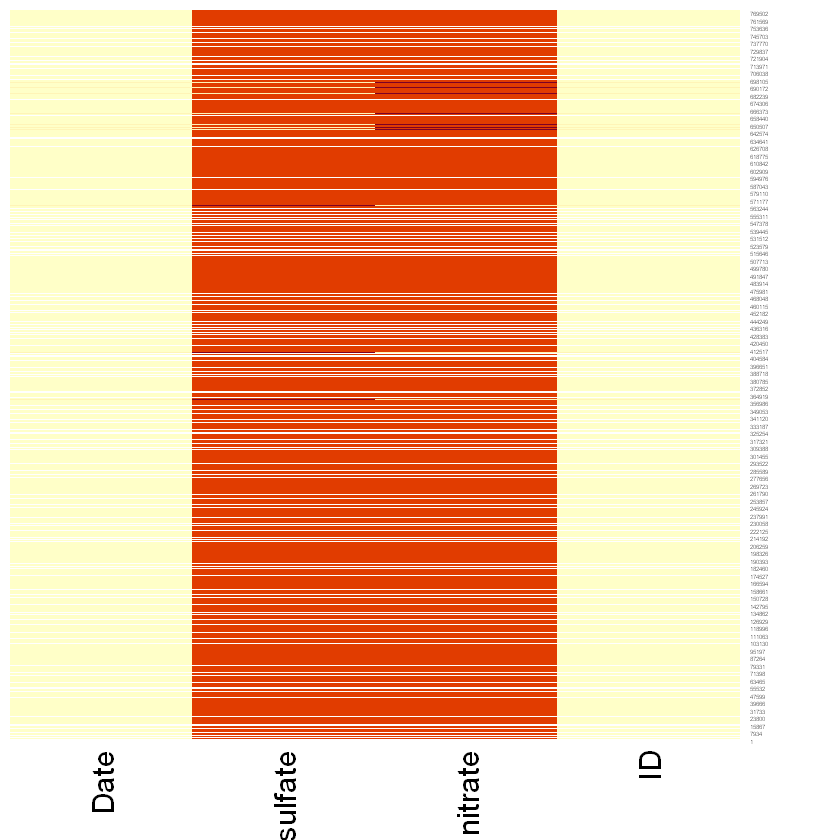

In [70]:
heatmap(1 * is.na(df), Rowv = NA, Colv = NA)